In [11]:
#importing all the libariries that needed to run the prediction model
import pandas as pd
import numpy as np
#sklearn libary importing support vector regression
from sklearn.svm import SVR
#importing linear regression
from sklearn.linear_model import LinearRegression
#importing matplotlib to plot the graph
import matplotlib.pyplot as plt
#importing KneighborClassfier from sklearn
from sklearn.neighbors import KNeighborsClassifier
#Importing metrics for the accuracy
from sklearn.metrics import accuracy_score
from pandas_datareader import data as pdr

In [12]:
cd C:\Users\rony1\Documents\New folder (2)

C:\Users\rony1\Documents\New folder (2)


In [14]:
#predicting the company Amazon by reading the csv. we taking a month of data to predict.
Amazon_df = pd.read_csv('AMZN1.csv')
Amazon_df.head(22)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,1641.510010,1759.449951,1626.030029,1689.150024,1689.150024,8917300
1,2020-03-17,1775.469971,1857.780029,1689.239990,1807.839966,1807.839966,10917100
2,2020-03-18,1750.000000,1841.660034,1745.000000,1830.000000,1830.000000,9645200
3,2020-03-19,1860.000000,1945.000000,1832.650024,1880.930054,1880.930054,10399900
4,2020-03-20,1926.310059,1957.000000,1820.729980,1846.089966,1846.089966,9817900
5,2020-03-23,1827.750000,1919.400024,1812.000000,1902.829956,1902.829956,7808500
6,2020-03-24,1951.500000,1955.000000,1900.339966,1940.099976,1940.099976,7147100
7,2020-03-25,1920.689941,1950.260010,1885.780029,1885.839966,1885.839966,6479100
8,2020-03-26,1902.000000,1956.489990,1889.290039,1955.489990,1955.489990,6221300
9,2020-03-27,1930.859985,1939.790039,1899.920044,1900.099976,1900.099976,5387900


In [16]:
#we need to create the dataset of x and y which is the two data set we going to take to predict the model
#so we have to take the date and we taking the "Close" cloumn
dates = []
prices = []
Amazon_df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
21,2020-04-15,2257.679932,2333.370117,2245.0,2307.679932,2307.679932,6866600


In [17]:
# retriving the data until the last row
Amazon_df = Amazon_df.head(len(Amazon_df)-1)
Amazon_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,1641.510010,1759.449951,1626.030029,1689.150024,1689.150024,8917300
1,2020-03-17,1775.469971,1857.780029,1689.239990,1807.839966,1807.839966,10917100
2,2020-03-18,1750.000000,1841.660034,1745.000000,1830.000000,1830.000000,9645200
3,2020-03-19,1860.000000,1945.000000,1832.650024,1880.930054,1880.930054,10399900
4,2020-03-20,1926.310059,1957.000000,1820.729980,1846.089966,1846.089966,9817900
5,2020-03-23,1827.750000,1919.400024,1812.000000,1902.829956,1902.829956,7808500
6,2020-03-24,1951.500000,1955.000000,1900.339966,1940.099976,1940.099976,7147100
7,2020-03-25,1920.689941,1950.260010,1885.780029,1885.839966,1885.839966,6479100
8,2020-03-26,1902.000000,1956.489990,1889.290039,1955.489990,1955.489990,6221300
9,2020-03-27,1930.859985,1939.790039,1899.920044,1900.099976,1900.099976,5387900


In [18]:
Amazon_df_dates = Amazon_df.loc[:, 'Date']
#Getting  all of the rows from the Close Column
Amazon_df_open = Amazon_df.loc[:, 'Close']

In [19]:
#building  the independent data set for x
for date in Amazon_df_dates:
 dates.append( [int(date.split('-')[2])])
  
#building the dependent data set for y
for Close_price in Amazon_df_open:
  prices.append(float(Close_price))
#printing all the dates 
print(dates)

[[16], [17], [18], [19], [20], [23], [24], [25], [26], [27], [30], [31], [1], [2], [3], [6], [7], [8], [9], [13], [14]]


In [22]:
#prediction model to build the relationship between x and y to do a prediction
def predict_prices(dates, prices, x):
  
  #Creating the  Support Vector Regression model
  svr_lin = SVR(kernel='linear', C= 1e3)
  svr_poly= SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma='auto')
  
  #TRAINING THE DATA SET TO GET THE MODEL OF PREDICTION 
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates,prices)
  svr_rbf.fit(dates,prices)
  
  #creating rhe model of LR
  lin_reg = LinearRegression()
  #Trainning the model
  lin_reg.fit(dates,prices)
  
  #Plot the models on a graph to see which has the best fit
  plt.scatter(dates, prices, color='black', label='Data')
  plt.plot(dates, svr_rbf.predict(dates), color='red', label='SVR RBF')
  plt.plot(dates, svr_poly.predict(dates), color='blue', label='SVR Poly')
  plt.plot(dates, svr_lin.predict(dates), color='green', label='SVR Linear')
  plt.plot(dates, lin_reg.predict(dates), color='orange', label='Linear Reg')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('SVR MODEL')
  plt.legend()
  plt.show()
  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0],svr_poly.predict(x)[0],lin_reg.predict(x)[0]


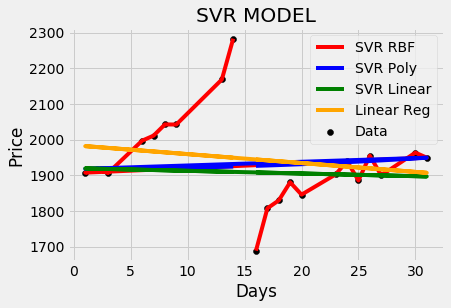

(1689.2501772328444, 1908.44116720002, 1926.8655847049235, 1944.7510066325983)


In [23]:
#Predict the price of daily Amazon stocks 
predicted_price = predict_prices(dates, prices, [[16]])
print(predicted_price)

In [24]:
#predicting using KNN
#getting the data set for AMAZON 
Amazon_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,1641.510010,1759.449951,1626.030029,1689.150024,1689.150024,8917300
1,2020-03-17,1775.469971,1857.780029,1689.239990,1807.839966,1807.839966,10917100
2,2020-03-18,1750.000000,1841.660034,1745.000000,1830.000000,1830.000000,9645200
3,2020-03-19,1860.000000,1945.000000,1832.650024,1880.930054,1880.930054,10399900
4,2020-03-20,1926.310059,1957.000000,1820.729980,1846.089966,1846.089966,9817900
5,2020-03-23,1827.750000,1919.400024,1812.000000,1902.829956,1902.829956,7808500
6,2020-03-24,1951.500000,1955.000000,1900.339966,1940.099976,1940.099976,7147100
7,2020-03-25,1920.689941,1950.260010,1885.780029,1885.839966,1885.839966,6479100
8,2020-03-26,1902.000000,1956.489990,1889.290039,1955.489990,1955.489990,6221300
9,2020-03-27,1930.859985,1939.790039,1899.920044,1900.099976,1900.099976,5387900


In [25]:
#Getting open-close and high-low to get the value
Amazon_df['Open-Close'] = Amazon_df.Open -Amazon_df.Close
Amazon_df['High-Low'] = Amazon_df.High -Amazon_df.Low
Amazon_df = Amazon_df.dropna()
X= Amazon_df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,-47.640014,133.419922
1,-32.369995,168.540039
2,-80.000000,96.660034
3,-20.930054,112.349976
4,80.220093,136.270020


In [26]:
Y= np.where(Amazon_df['Close'].shift(-1)>Amazon_df['Close'],1,-1)

In [27]:
#splitting the data and trainning the data with x and Y variables
#splitting the 60% of the data
split_percentage = 0.6
split = int(split_percentage*len(Amazon_df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[:split]
Y_test = Y[:split]

In [30]:
#k = 12, then the object is simply assigned to the class of that nearest neighbor.
knn = KNeighborsClassifier(n_neighbors=12)
#Fitting the data for x and y VARIABLE
knn.fit(X_train, Y_train)
#trainnig the accuracy train and and test data
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

In [31]:
#printing out the tran and test results for the model
print(accuracy_train)
print(accuracy_test)

0.5833333333333334
0.5833333333333334
